# ***`Stock Proce Prediction `***



> About This Project





1. **Data Loading and Preprocessing:**
   - You loaded historical stock price data from a CSV file using the pandas library.
   - You converted the 'Date' column from string format to datetime format using a custom function `str_to_datetime`.
   - You organized the data into a DataFrame with 'Date' as the index and 'Close' prices as the target variable.

2. **Windowed Data Preparation:**
   - You implemented the `df_to_windowed_df` function to create a windowed dataset for time series forecasting.
   - This function generated a dataset where each data point included a window of historical prices and the corresponding target price.

3. **Model Input Preparation:**
   - You used the `windowed_df_to_date_X_y` function to convert the windowed DataFrame into input features (`X`) and target values (`y`).
   - The input features were reshaped to have a third dimension (time steps).

4. **Training and Validation Split:**
   - You split the dataset into training, validation, and test sets based on the proportion of data.

5. **Model Development and Visualization:**
   - You utilized TensorFlow to build a machine learning model for stock price prediction.
   - You trained the model using the training data and monitored its performance on the validation set.
   - You used matplotlib to visualize the training, validation, and test predictions against the actual stock prices.

6. **Visualization of Predictions:**
   - You plotted the training predictions along with the training observations.
   - You did the same for validation and test predictions against their respective observations.
   - These visualizations allowed you to assess the accuracy of the model's predictions.

7. **Conclusion and Insights:**
   - Although not explicitly mentioned in the provided code, it can be inferred that the project aimed to predict stock prices using a machine learning model trained on historical data.
   - The final outcome of the project was the observed alignment (or lack thereof) between the model's predictions and actual stock prices.

The code showcases your understanding of data preprocessing, model building, training, validation, testing, and visualization within the context of stock price prediction. It demonstrates a practical application of machine learning techniques to analyze and forecast financial time series data.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...,...
9429,2023-08-11,320.260010,322.410004,319.209991,321.010010,320.331787,24342600
9430,2023-08-14,321.390015,324.059998,320.079987,324.040009,323.355408,18836100
9431,2023-08-15,323.000000,325.089996,320.899994,321.859985,321.179962,16966300
9432,2023-08-16,320.799988,324.420013,319.799988,320.399994,320.399994,20698900


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9429,2023-08-11,321.010010
9430,2023-08-14,324.040009
9431,2023-08-15,321.859985
9432,2023-08-16,320.399994


In [ ]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9429    2023-08-11
9430    2023-08-14
9431    2023-08-15
9432    2023-08-16
9433    2023-08-17
Name: Date, Length: 9434, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9429,2023-08-11,321.010010
9430,2023-08-14,324.040009
9431,2023-08-15,321.859985
9432,2023-08-16,320.399994


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-6-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9429   2023-08-11
9430   2023-08-14
9431   2023-08-15
9432   2023-08-16
9433   2023-08-17
Name: Date, Length: 9434, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-08-11,321.010010
2023-08-14,324.040009
2023-08-15,321.859985


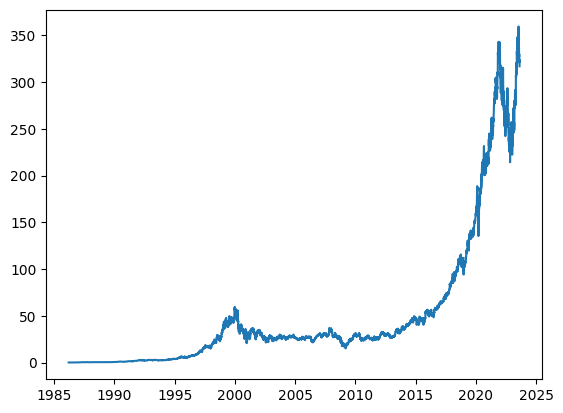

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2022-03-13',
                                '2023-08-10',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-03-13,275.850006,288.500000,285.589996,280.070007
1,2022-03-15,285.589996,280.070007,276.440002,287.149994
2,2022-03-16,280.070007,276.440002,287.149994,294.390015
3,2022-03-17,276.440002,287.149994,294.390015,295.220001
4,2022-03-18,287.149994,294.390015,295.220001,300.429993
...,...,...,...,...,...
350,2023-08-04,336.339996,327.500000,326.660004,327.779999
351,2023-08-07,327.500000,326.660004,327.779999,330.109985
352,2023-08-08,326.660004,327.779999,330.109985,326.049988
353,2023-08-09,327.779999,330.109985,326.049988,322.230011


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((355,), (355, 3, 1), (355,))

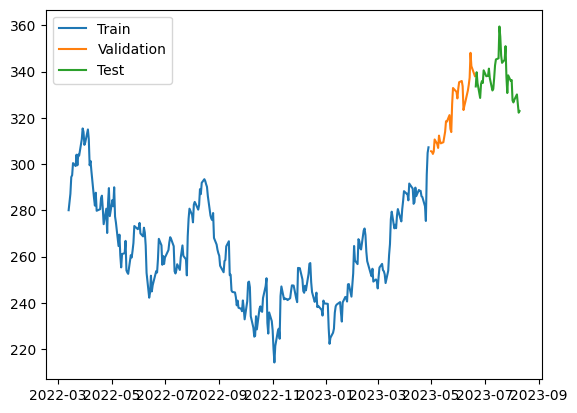

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

9/9 [==============================] - 0s 3ms/step


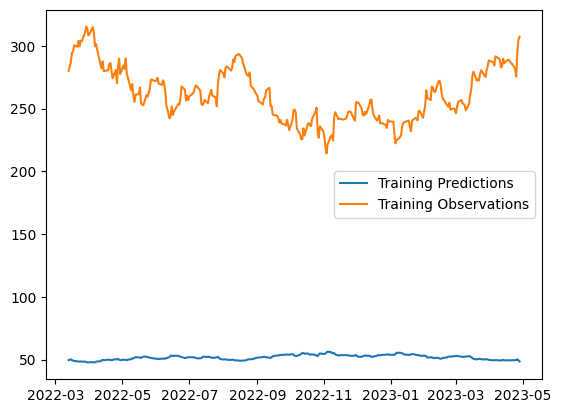

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 8ms/step


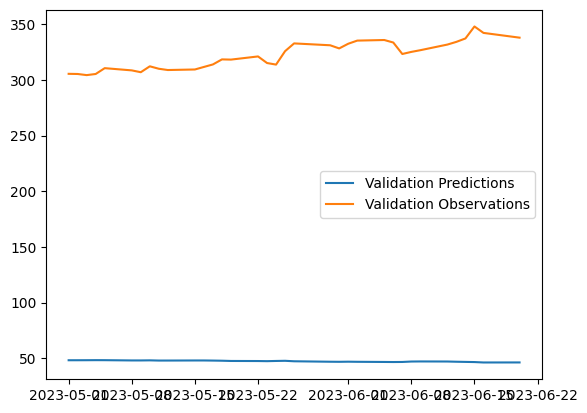

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 9ms/step


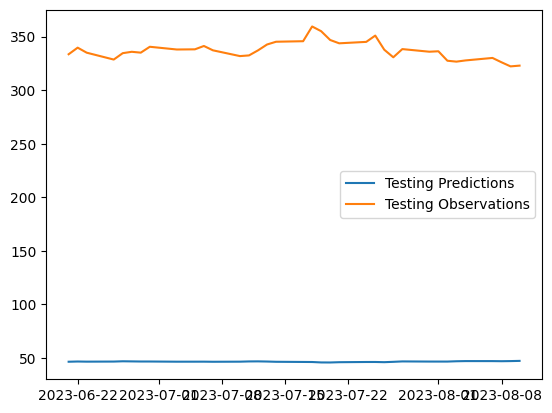

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

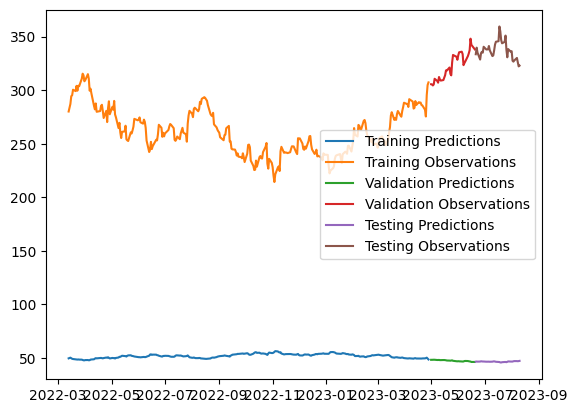

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])